In [29]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [14]:
data1 = load_wine()
data = pd.DataFrame(data1.data,columns=data1.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [36]:
y = pd.DataFrame(data1.target, columns = ["target"])
y["target"].unique()

array([0, 1, 2])

In [16]:
data.shape

(178, 13)

In [ ]:
data.describe()

In [24]:
#No nulls are detected
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [43]:
#Normalization is done although it is not strictly needed in LDA
# The LDA for standardized and non-standardized features will be exactly the same
X = data.values

X_norm = normalize(X)


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1694: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if norm not in ('l1', 'l2', 'max'):


ValueError: '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]' is not a supported norm

In [45]:
lda = LinearDiscriminantAnalysis(n_components = 2)
y = y.values
lda.fit(X_norm, y)

C:\Users\zahra\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

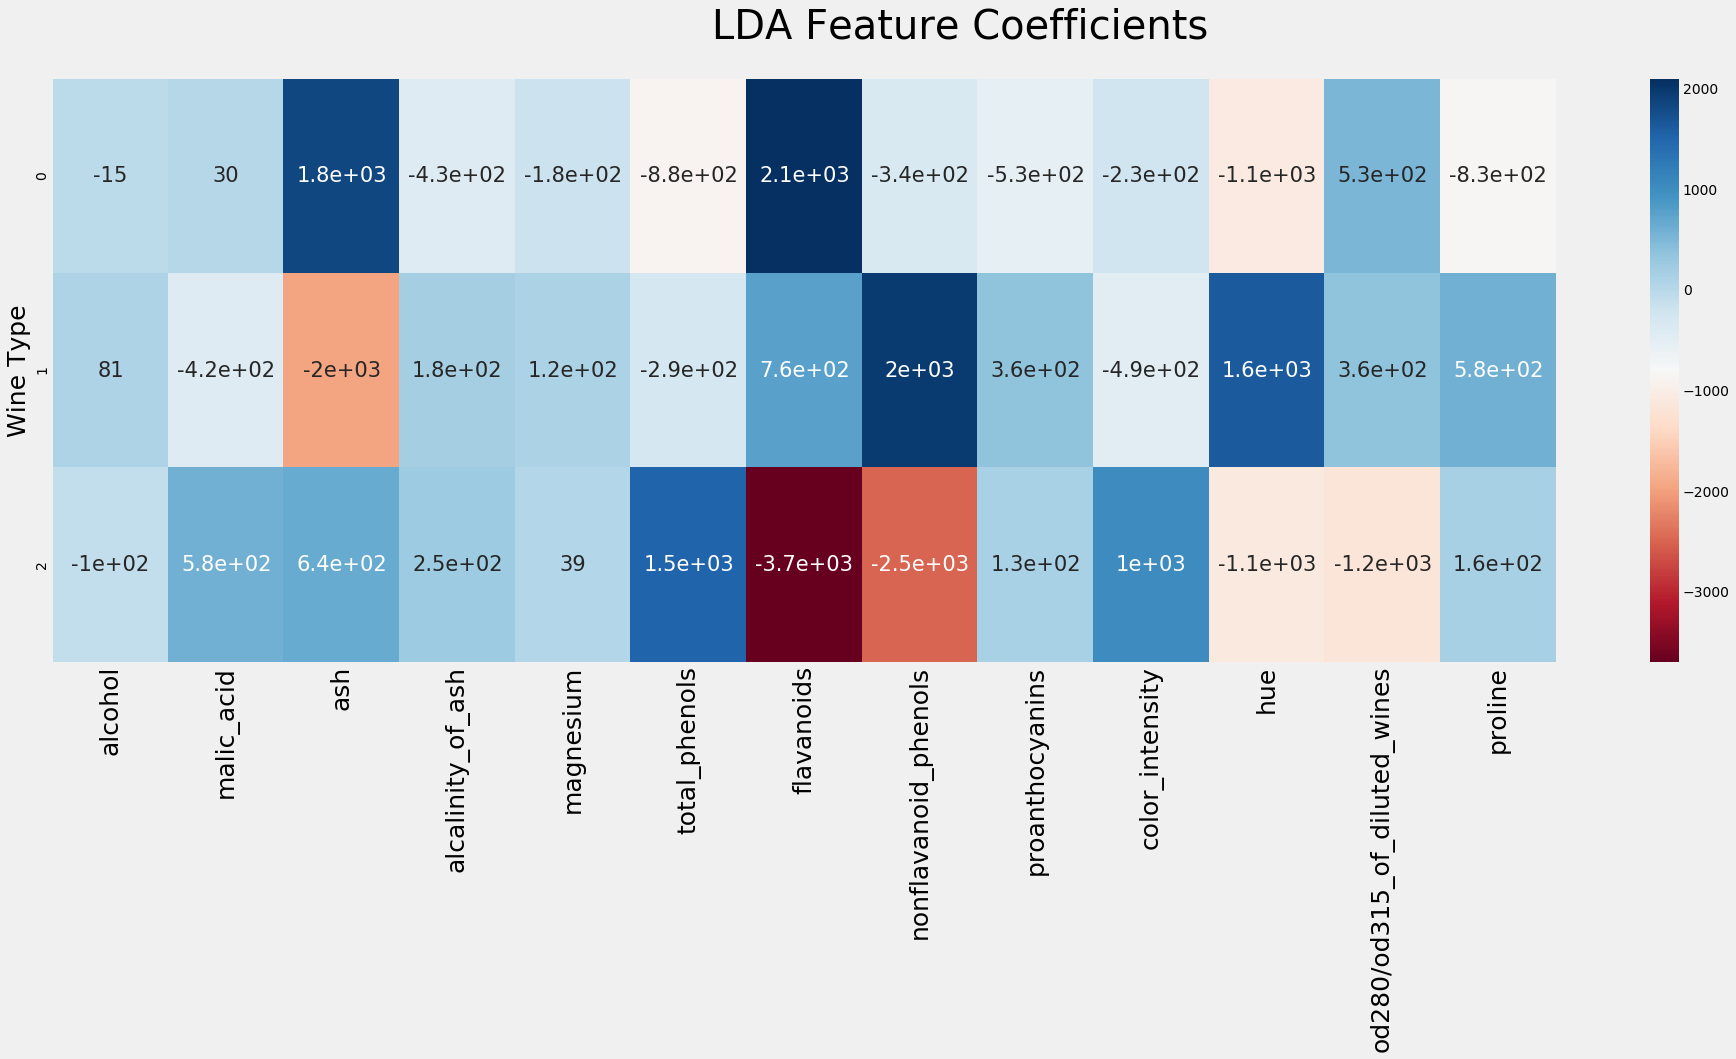

In [67]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(30, 10))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=data.columns, 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=True,annot_kws={"fontsize":21})

plt.xticks(fontsize=25)
plt.ylabel("Wine Type", fontsize = 25 )
plt.suptitle('LDA Feature Coefficients', fontsize = 40)
pass